Assumption in MLE: Error term should follow normal distribution. Whenever the error term not follow normal distribution MLE is the best way

In [1]:
import numpy as np
from scipy.optimize import minimize
import scipy.stats as stats

In [2]:
# ScreenShot 1527
import pandas as pd
tbl = pd.read_excel('mle.xlsx')
tbl

,Id,Y,X
0,1,2,1
1,2,6,4
2,3,7,5
3,4,9,6
4,5,15,9


In [3]:
import statsmodels.api as sm
x = tbl['X']
y = tbl['Y']
x2 = sm.add_constant(x)
modl = sm.OLS(y,x2)
modl2 = modl.fit()
print(modl2.summary())

                            OLS Regression Results                            
Dep. Variable:                      Y   R-squared:                       0.980
Model:                            OLS   Adj. R-squared:                  0.973
Method:                 Least Squares   F-statistic:                     145.9
Date:                Wed, 23 Aug 2023   Prob (F-statistic):            0.00122
Time:                        14:24:14   Log-Likelihood:                -4.5811
No. Observations:                   5   AIC:                             13.16
Df Residuals:                       3   BIC:                             12.38
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const         -0.2882      0.755     -0.382      0.7

D:\Anaconda3\lib\site-packages\statsmodels\stats\stattools.py:74: ValueWarning: omni_normtest is not valid with less than 8 observations; 5 samples were given.
  warn("omni_normtest is not valid with less than 8 observations; %i "


In [4]:
e = modl2.resid # error terms
e

0    0.670588
1   -0.182353
2   -0.800000
3   -0.417647
4    0.729412
dtype: float64

In [5]:
np.std(e) # std dev of error variable

0.604882098380483

In [6]:
# import numpy and minimize(from scipy.optimize)
import matplotlib.pyplot as plt

def lik(parameters):
    m = parameters[0] # slope
    b = parameters[1] # intercept
    sigma = parameters[2] # standard deviation of error term
    
    for i in np.arange(0, len(x)): # 0 to all values of x
        y_exp = m*x + b # y-expected value
    L = (len(x)/2 * np.log(2*np.pi) + len(x)/2 * np.log(sigma**2) + 1 / (2*sigma**2) * sum((y-y_exp)**2)) #Estimating log likelihood
    return L

x = np.array([1,4,5,6,9])
y = np.array([2,6,7,9,15])
lik_model = minimize(lik, np.array([2,2,2]), method='L-BFGS-B') # 2,2,2 is randomly guessed ans 1st->slope, 2nd->y-intercept, 3rd->std dev of error term 
lik_model

# x: array([slope, y-intercept, std-dev of error term])

  message: CONVERGENCE: REL_REDUCTION_OF_F_<=_FACTR*EPSMCH
  success: True
   status: 0
      fun: 4.581084072760773
        x: [ 1.618e+00 -2.882e-01  6.049e-01]
      nit: 18
      jac: [ 1.181e-05  7.994e-07  1.421e-06]
     nfev: 108
     njev: 27
 hess_inv: <3x3 LbfgsInvHessProduct with dtype=float64>

In [7]:
lik_model = minimize(lik, np.array([3,3,4]), method='L-BFGS-B')
lik_model

  message: CONVERGENCE: NORM_OF_PROJECTED_GRADIENT_<=_PGTOL
  success: True
   status: 0
      fun: 4.581084072760639
        x: [ 1.618e+00 -2.882e-01  6.049e-01]
      nit: 20
      jac: [ 1.421e-06  0.000e+00  2.487e-06]
     nfev: 124
     njev: 31
 hess_inv: <3x3 LbfgsInvHessProduct with dtype=float64>

In [8]:
lik_model.x

array([ 1.61764705, -0.28823527,  0.60488218])

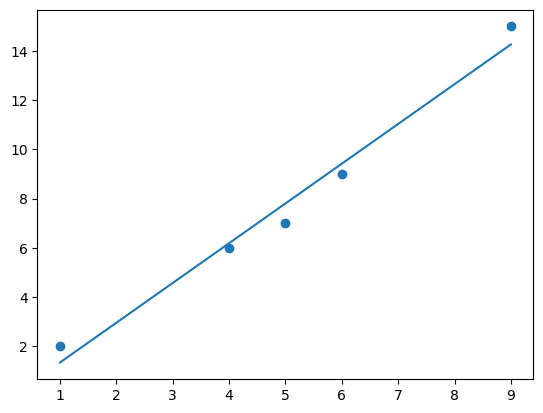

In [9]:
plt.scatter(x,y)
plt.plot(x, lik_model['x'][0]*x + lik_model['x'][1])
plt.show()

In [10]:
# ScreenShot 1551
# pandas as pd
tbl2 = pd.read_excel('mle2.xlsx')
tbl2

,TV Ads,Cars Sold
0,1,14
1,3,24
2,2,18
3,1,17
4,3,27


In [11]:
# statsmodels.api as sm
x = tbl2['TV Ads']
y = tbl2['Cars Sold']
x2 = sm.add_constant(x)
mod = sm.OLS(y,x2)
mod2 = mod.fit()
print(mod2.summary())

                            OLS Regression Results                            
Dep. Variable:              Cars Sold   R-squared:                       0.877
Model:                            OLS   Adj. R-squared:                  0.836
Method:                 Least Squares   F-statistic:                     21.43
Date:                Wed, 23 Aug 2023   Prob (F-statistic):             0.0190
Time:                        14:24:19   Log-Likelihood:                -9.6687
No. Observations:                   5   AIC:                             23.34
Df Residuals:                       3   BIC:                             22.56
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const         10.0000      2.366      4.226      0.0

D:\Anaconda3\lib\site-packages\statsmodels\stats\stattools.py:74: ValueWarning: omni_normtest is not valid with less than 8 observations; 5 samples were given.
  warn("omni_normtest is not valid with less than 8 observations; %i "


In [12]:
# b0=10 & b1=5
e=mod2.resid
e

0   -1.0
1   -1.0
2   -2.0
3    2.0
4    2.0
dtype: float64

In [13]:
np.std(e)

1.6733200530681516

In [14]:
# import numpy and minimize(fromscipy.optimize)
import matplotlib.pyplot as plt

def lik(parameters):
    m = parameters[0] # slope
    b = parameters[1] # intercept
    sigma = parameters[2] # standard deviation of error term
    
    for i in np.arange(0, len(x)): # 0 to all values of x
        y_exp = m*x + b # y-expected value
    L = (len(x)/2 * np.log(2*np.pi) + len(x)/2 * np.log(sigma**2) + 1 / (2*sigma**2) * sum((y-y_exp)**2)) #Estimating log likelihood
    return L

x = np.array([1,3,2,1,3])
y = np.array([14,24,18,17,27])
lik_model2 = minimize(lik, np.array([2,2,2]), method='Nelder-Mead') # 2,2,2 is randomly guessed ans 1st->slope, 2nd->y-intercept, 3rd->std dev of error term
lik_model2

# x: array([slope, y-intercept, std-dev of error term])

       message: Optimization terminated successfully.
       success: True
        status: 0
           fun: 9.668741209395263
             x: [ 5.000e+00  1.000e+01  1.673e+00]
           nit: 118
          nfev: 212
 final_simplex: (array([[ 5.000e+00,  1.000e+01,  1.673e+00],
                       [ 5.000e+00,  1.000e+01,  1.673e+00],
                       [ 5.000e+00,  1.000e+01,  1.673e+00],
                       [ 5.000e+00,  1.000e+01,  1.673e+00]]), array([ 9.669e+00,  9.669e+00,  9.669e+00,  9.669e+00]))

In [15]:
# diff metods of minimize
minimize?
# shift+enter